In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

K.tensorflow_backend._get_available_gpus()

base_dir = r'C:\Users\Vítor\Documents\TCC\Banco de Dados\BD_Sem_Pretos\Sagital\BD'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

Using TensorFlow backend.


In [2]:
from keras import layers
from keras import models
#Criando a CNN
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 256)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 256)       590080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)       590080    
__________

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
from keras.preprocessing.image import ImageDataGenerator

# Todas as imagens em nova scale
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,  
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,  
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        
        train_dir,
        # Todas as images para novo tamanho de 150x150
        target_size=(150, 150),
        batch_size=20,
        # Como foi usado a perda binary_crossentropy, precisamos de rótulos binários
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 8349 images belonging to 2 classes.
Found 3146 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [20]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 62s 617ms/step - loss: 0.9432 - acc: 0.5440 - val_loss: 0.6967 - val_acc: 0.5240
Epoch 2/30
100/100 [==============================] - 69s 692ms/step - loss: 0.6849 - acc: 0.5620 - val_loss: 0.6669 - val_acc: 0.5800
Epoch 3/30
100/100 [==============================] - 66s 663ms/step - loss: 0.6690 - acc: 0.5795 - val_loss: 0.7053 - val_acc: 0.4940
Epoch 4/30
100/100 [==============================] - 56s 562ms/step - loss: 0.6575 - acc: 0.6090 - val_loss: 0.6584 - val_acc: 0.5882
Epoch 5/30
100/100 [==============================] - 49s 490ms/step - loss: 0.6577 - acc: 0.6017 - val_loss: 0.6496 - val_acc: 0.6130
Epoch 6/30
100/100 [==============================] - 50s 500ms/step - loss: 0.6493 - acc: 0.6175 - val_loss: 0.6561 - val_acc: 0.5850
Epoch 7/30
100/100 [==============================] - 48s 478ms/step - loss: 0.6582 - acc: 0.5865 - val_loss: 0.6444 - val_acc: 0.5771
Epoch 8/30
100/100 [==============================] - 4

A acurácia da validação é de: 0.5770000016689301
A perda da validação é de: 0.7260199344158172


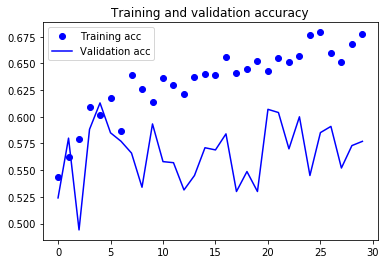

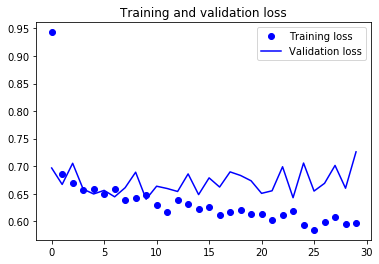

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('A acurácia da validação é de:', val_acc[29])
print('A perda da validação é de:', val_loss[29])
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()